C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2808\1415558558.py:39: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2808\1415558558.py:39: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2808\1415558558.py:39: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2808\1415558558.py:39: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2808\1415558558.py:39: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2808\1415558558.py:39

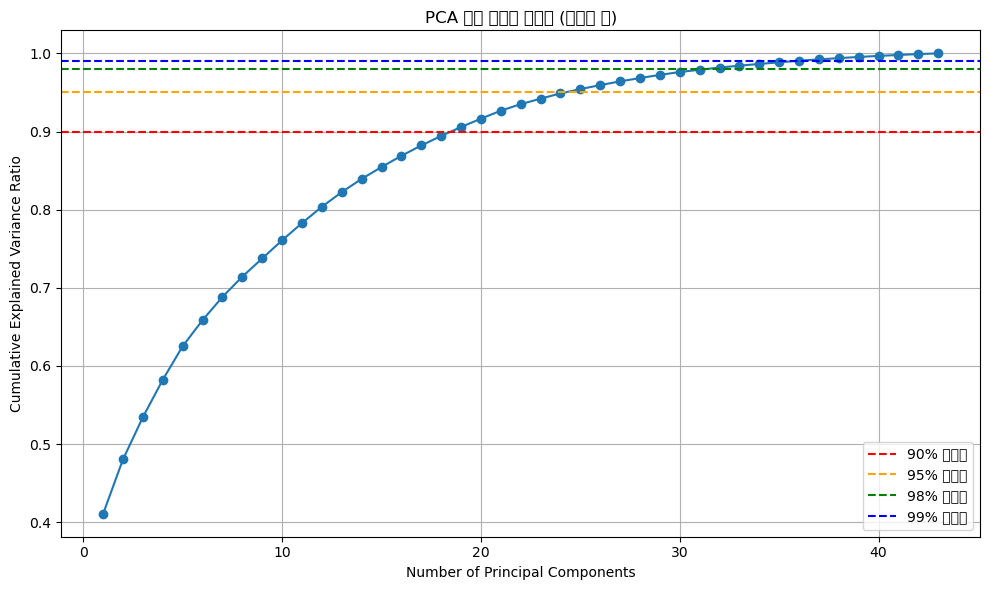

✅ 누적기여도 95%에 도달하는 주성분 수: 25


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ▶ 1. CSV 로딩
df = pd.read_csv('피처_43/피처 선택/43_Segment 추가.csv')  # 경로 입력

# ▶ 2. 문자형 제거 및 숫자형만 선택
X = df.drop(columns=['Segment'], errors='ignore')       # Segment 컬럼 제거
X = X.select_dtypes(include=['number'])                 # 숫자형 컬럼만 남기기

# ▶ 3. 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ▶ 4. PCA 수행 (전체 주성분)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# ▶ 5. 누적 기여도 계산
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# ▶ 6. 누적 기여도 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% 기준선')
plt.axhline(y=0.95, color='orange', linestyle='--', label='95% 기준선')
plt.axhline(y=0.98, color='green', linestyle='--', label='98% 기준선')
plt.axhline(y=0.99, color='blue', linestyle='--', label='99% 기준선')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA 누적 기여도 그래프 (표준화 후)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ▶ 7. 95% 누적 기여도 만족하는 주성분 개수 선택
n_components_95 = np.argmax(cumulative_var >= 0.95) + 1
print(f"✅ 누적기여도 95%에 도달하는 주성분 수: {n_components_95}")

# ▶ 8. 선택된 주성분으로 데이터 변환
pca_95 = PCA(n_components=n_components_95)
X_pca_95 = pca_95.fit_transform(X_scaled)

# ▶ 9. DataFrame으로 변환 (선택 사항)
df_pca_95 = pd.DataFrame(X_pca_95, columns=[f'PC{i+1}' for i in range(n_components_95)])


In [6]:
df_pca_95

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,0.406938,2.688805,-0.207260,-1.172307,-0.348146,1.573544,-0.937826,-1.803072,0.195277,0.528650,...,1.477434,-1.246110,0.468793,0.091692,-0.137820,-0.436578,1.201287,0.966893,-0.112985,-0.225288
1,-0.166034,-0.419589,-1.283658,-0.075038,-0.544222,0.500182,0.702474,-0.631393,0.028634,-0.007551,...,0.299674,-0.263508,0.158701,-1.028914,1.342768,-0.160455,-0.335270,-0.181482,0.201372,0.067016
2,4.212860,3.472750,1.215866,-2.229524,-0.760537,0.916758,-1.983204,-1.495121,0.036957,0.380955,...,-0.064588,-1.968841,-0.116435,0.641789,-0.654043,0.792336,1.411339,-0.622461,0.715948,-0.700654
3,1.245540,5.312687,-0.611583,-2.245108,-0.816445,0.644638,-1.829241,-1.930722,0.239981,0.693766,...,0.925343,-0.990393,0.672990,-0.344890,-0.402813,-0.185696,0.572986,0.844575,0.051751,0.089511
4,-3.219714,-0.876185,2.188227,0.003387,0.572335,-2.062766,-1.534731,0.895620,-0.065349,-0.122259,...,-0.792360,-0.705889,0.706172,-0.310340,0.111958,0.150450,0.066242,-0.142973,-0.143224,0.110297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,-3.657029,-0.058908,0.493998,0.197399,1.127688,1.122536,0.358390,-0.255589,-0.148234,-0.196581,...,-0.887459,0.207125,-1.326222,-0.081766,-1.217406,-0.295256,0.274477,0.126656,-0.097969,-0.076685
2399996,3.678406,-0.422683,1.257217,-1.300649,-0.223398,0.149438,-2.521992,-0.945458,-0.626263,-0.901605,...,1.788156,-0.469930,0.159158,0.193793,0.916842,0.528493,0.718874,-0.689534,-0.364596,-0.750378
2399997,1.137458,1.871482,0.753622,2.170173,-0.887683,0.118273,-0.344086,0.224273,0.069154,0.147713,...,1.070839,2.042184,-0.248841,-0.543144,-0.501844,-1.010704,-0.188943,-0.403509,0.653909,-0.037131
2399998,-3.743985,-0.391885,-0.287399,0.175900,-0.386017,0.155290,0.091925,0.017544,-0.183154,-0.357117,...,-0.139996,-0.205976,0.147618,-0.186822,-0.432557,0.150342,0.164485,0.181408,-0.039449,0.056013


In [7]:
# ▶ Segment 컬럼이 원래 데이터에 존재했을 경우
if 'Segment' in df.columns:
    df_pca_95['Segment'] = df['Segment'].values

# ▶ 저장 경로 지정 (예시 경로 수정 가능)
output_path = 'pca_95_segment.csv'

# ▶ CSV 파일로 저장
df_pca_95.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"✅ 저장 완료: {output_path}")

✅ 저장 완료: pca_95_segment.csv


In [8]:
df_pca_95

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,Segment
0,0.406938,2.688805,-0.207260,-1.172307,-0.348146,1.573544,-0.937826,-1.803072,0.195277,0.528650,...,-1.246110,0.468793,0.091692,-0.137820,-0.436578,1.201287,0.966893,-0.112985,-0.225288,D
1,-0.166034,-0.419589,-1.283658,-0.075038,-0.544222,0.500182,0.702474,-0.631393,0.028634,-0.007551,...,-0.263508,0.158701,-1.028914,1.342768,-0.160455,-0.335270,-0.181482,0.201372,0.067016,E
2,4.212860,3.472750,1.215866,-2.229524,-0.760537,0.916758,-1.983204,-1.495121,0.036957,0.380955,...,-1.968841,-0.116435,0.641789,-0.654043,0.792336,1.411339,-0.622461,0.715948,-0.700654,C
3,1.245540,5.312687,-0.611583,-2.245108,-0.816445,0.644638,-1.829241,-1.930722,0.239981,0.693766,...,-0.990393,0.672990,-0.344890,-0.402813,-0.185696,0.572986,0.844575,0.051751,0.089511,D
4,-3.219714,-0.876185,2.188227,0.003387,0.572335,-2.062766,-1.534731,0.895620,-0.065349,-0.122259,...,-0.705889,0.706172,-0.310340,0.111958,0.150450,0.066242,-0.142973,-0.143224,0.110297,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,-3.657029,-0.058908,0.493998,0.197399,1.127688,1.122536,0.358390,-0.255589,-0.148234,-0.196581,...,0.207125,-1.326222,-0.081766,-1.217406,-0.295256,0.274477,0.126656,-0.097969,-0.076685,E
2399996,3.678406,-0.422683,1.257217,-1.300649,-0.223398,0.149438,-2.521992,-0.945458,-0.626263,-0.901605,...,-0.469930,0.159158,0.193793,0.916842,0.528493,0.718874,-0.689534,-0.364596,-0.750378,D
2399997,1.137458,1.871482,0.753622,2.170173,-0.887683,0.118273,-0.344086,0.224273,0.069154,0.147713,...,2.042184,-0.248841,-0.543144,-0.501844,-1.010704,-0.188943,-0.403509,0.653909,-0.037131,C
2399998,-3.743985,-0.391885,-0.287399,0.175900,-0.386017,0.155290,0.091925,0.017544,-0.183154,-0.357117,...,-0.205976,0.147618,-0.186822,-0.432557,0.150342,0.164485,0.181408,-0.039449,0.056013,E
